In [124]:
import dask_image.imread
import dask_image.ndfilters
import dask_image.ndmeasure
import dask.array as da

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [89]:
path = os.path.join('../../data/flower/', '*.png')
flowers = dask_image.imread.imread(path)
print(flowers)

dask.array<concatenate, shape=(210, 128, 128, 4), dtype=uint8, chunksize=(1, 128, 128, 4), chunktype=numpy.ndarray>


In [90]:
def plot_10_examples(result):
    #display 10 examples from images

    fig, ((ax0, ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8, ax9)) = plt.subplots(figsize=(20, 7), nrows=2, ncols=5)
    ax0.imshow(result[0, ...], cmap='gray')
    ax1.imshow(result[1, ...], cmap='gray')
    ax2.imshow(result[2, ...], cmap='gray')
    ax3.imshow(result[3, ...], cmap='gray')
    ax4.imshow(result[4, ...], cmap='gray')
    ax5.imshow(result[6, ...], cmap='gray')
    ax6.imshow(result[6, ...], cmap='gray')
    ax7.imshow(result[7, ...], cmap='gray')
    ax8.imshow(result[8, ...], cmap='gray')
    ax9.imshow(result[9, ...], cmap='gray')


    # Don't display axes
    ax0.axis('off')
    ax1.axis('off')
    ax2.axis('off')
    ax3.axis('off')
    ax4.axis('off')
    ax5.axis('off')
    ax6.axis('off')
    ax7.axis('off')
    ax8.axis('off')
    ax9.axis('off')


    # Display images
    plt.show(fig)

## Grayscale

In [91]:
def grayscale(rgb):
    result = ((rgb[..., 0] * 0.2125) +
              (rgb[..., 1] * 0.7154) +
              (rgb[..., 2] * 0.0721))
    return result

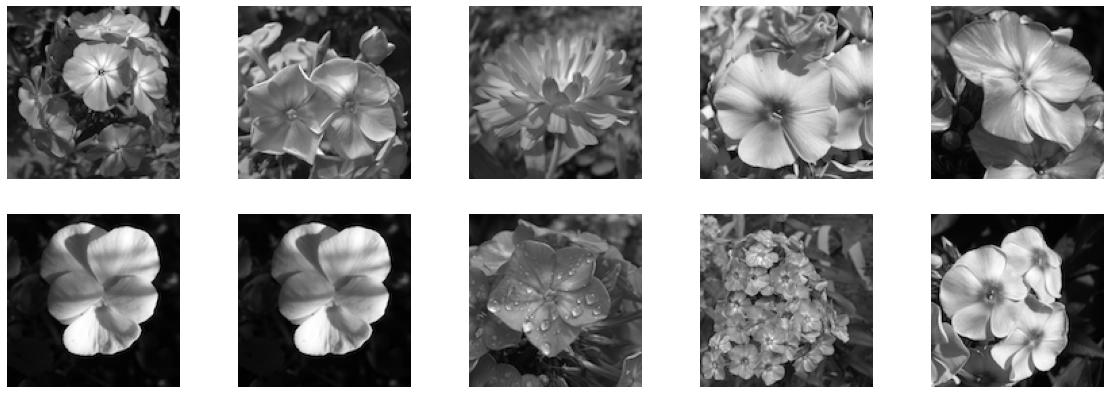

In [92]:
result = grayscale(flowers)

plot_10_examples(result)

## Segmentation

In [93]:
threshold_value = 0.75 * da.max(flowers).compute()
print(threshold_value)

191.25


In [94]:
def segment(rgb, threshold):
    threshold_image = rgb > threshold
    result = ((threshold_image[..., 0] ) +
              (threshold_image[..., 1] ) +
              (threshold_image[..., 2] ))
    return result

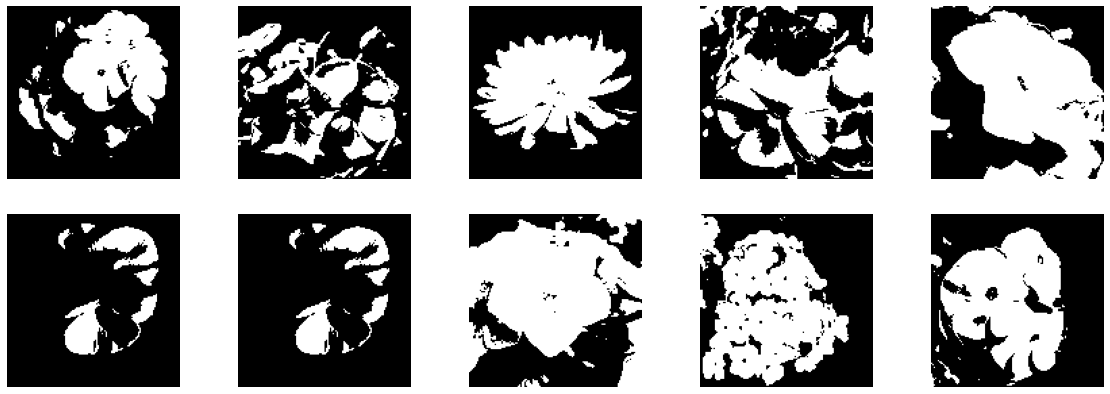

In [95]:
img = segment(flowers, threshold_value)

plot_10_examples(img)

## Num of labels

In [114]:
label_image, num_labels = dask_image.ndmeasure.label(img[1,...])

Number of labels: 46


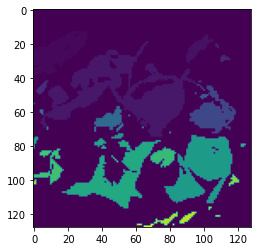

In [115]:
print("Number of labels:", int(num_labels))
plt.imshow(label_image, cmap='viridis')

In [122]:
index = list(range(int(num_labels)))  # Note that we're including the background label=0 here, too.
out_dtype = float  # The data type we want to use for our results.
default = None     # The value to return if an element of index does not exist in the label image.
mean_values = dask_image.ndmeasure.labeled_comprehension(flowers[1,:,:,0], label_image, index, dask_image.ndmeasure.mean, out_dtype, default, pass_positions=False)
print(mean_values.compute())

[106.48153632 229.35254989 230.75728155 221.46188851 200.75
 213.66666667 211.11538462 201.         196.         200.
 206.26890756 187.         197.         192.         200.66666667
 192.         200.01709402 198.6        192.         204.375
 193.5        193.66666667 192.         196.         197.57142857
 216.65241228 212.         211.36842105 216.03356643 219.6
 201.5        209.48148148 215.19298246 208.22222222 194.
 194.         191.         186.         211.6        214.6
 202.66666667 206.02857143 214.53333333 197.         198.66666667
 196.42857143]


In [123]:
stdev_values = dask_image.ndmeasure.labeled_comprehension(flowers[1,:,:,0], label_image, index, dask_image.ndmeasure.standard_deviation, out_dtype, default, pass_positions=False)

In [126]:
df = pd.DataFrame()
df['label'] = index
df['mean'] = mean_values.compute()
df['standard_deviation'] = stdev_values.compute()

df

,label,mean,standard_deviation
0,0,106.481536,63.609571
1,1,229.352550,16.263827
2,2,230.757282,21.308855
3,3,221.461889,19.158357
4,4,200.750000,3.960745
5,5,213.666667,23.471022
6,6,211.115385,12.619664
7,7,201.000000,5.000000
8,8,196.000000,5.000000
9,9,200.000000,0.000000


array([[<AxesSubplot:title={'center':'label'}>,
        <AxesSubplot:title={'center':'mean'}>],
       [<AxesSubplot:title={'center':'standard_deviation'}>,
        <AxesSubplot:>]], dtype=object)

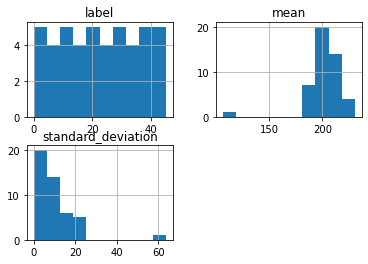

In [127]:
df.hist()